<a href="https://colab.research.google.com/github/Abhishek4848/IPL-Match-Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [1]:
urlfile<-'https://raw.githubusercontent.com/Abhishek4848/IPL-Match-Analysis/main/matches.csv'
df<-read.csv(url(urlfile))

In [2]:
dim(df)

[1] 756  18

# Importing Packages

In [3]:
install.packages("ggplot2")
install.packages("corrplot")
install.packages("plotrix")
library("corrplot")
library("ggplot2")
library("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



## Displaying the top 5 and the bottom 5 records of the data frame

In [4]:
head(df,5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
3,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
4,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,


In [5]:
tail(df,5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
752,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,,,
755,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
756,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


# Exploratory Data Analysis

In [6]:
summary(df)

       id              season         city               date          
 Min.   :    1.0   Min.   :2008   Length:756         Length:756        
 1st Qu.:  189.8   1st Qu.:2011   Class :character   Class :character  
 Median :  378.5   Median :2013   Mode  :character   Mode  :character  
 Mean   : 1792.2   Mean   :2013                                        
 3rd Qu.:  567.2   3rd Qu.:2016                                        
 Max.   :11415.0   Max.   :2019                                        
    team1              team2           toss_winner        toss_decision     
 Length:756         Length:756         Length:756         Length:756        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

### Correlation matrix

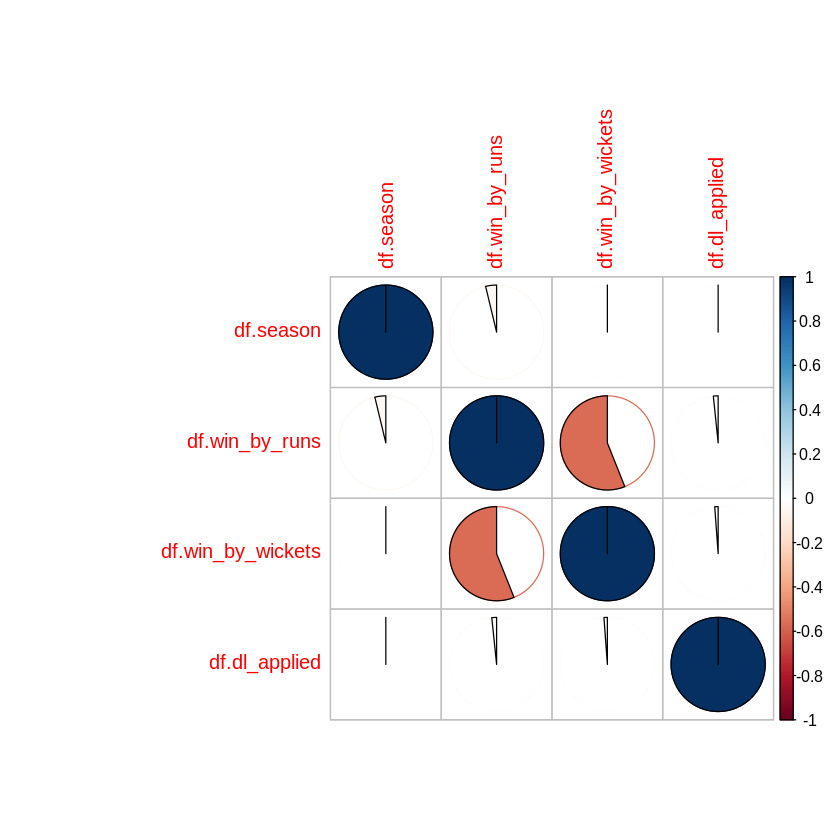

In [7]:
x = data.frame(df$season,df$win_by_runs,df$win_by_wickets,df$dl_applied)
corrplot(cor(x),method="pie")

### Most Successful teams in the History of IPL

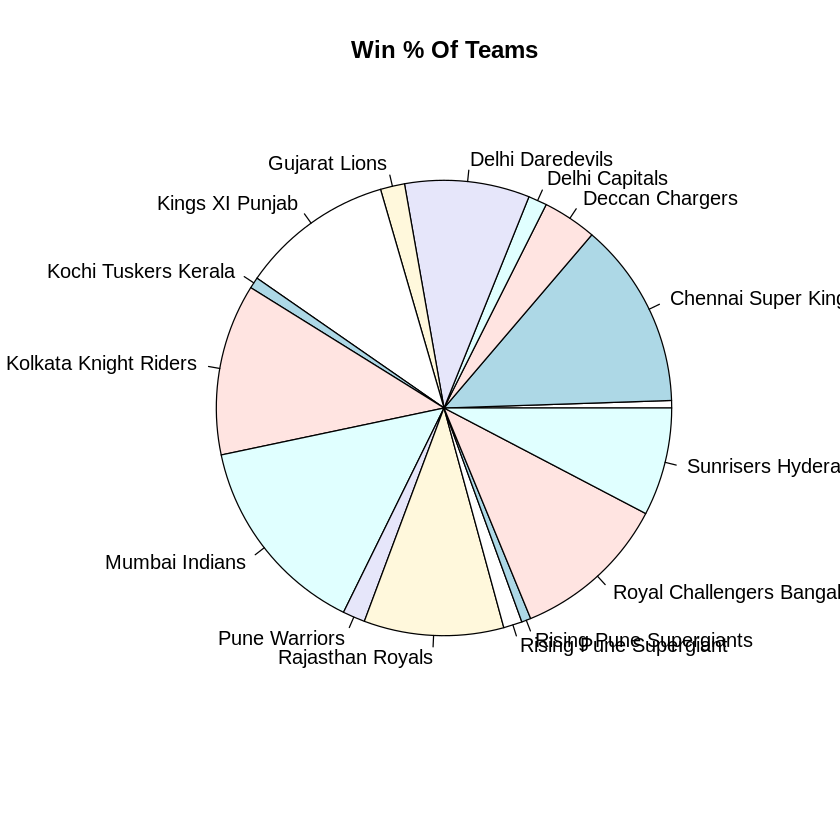

In [8]:
pie(table(df$winner),main="Win % Of Teams")

In [26]:
win = c(df$winner)
winners<-data.frame(sort(table(win),decreasing=T))
winners

win,Freq
<fct>,<int>
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


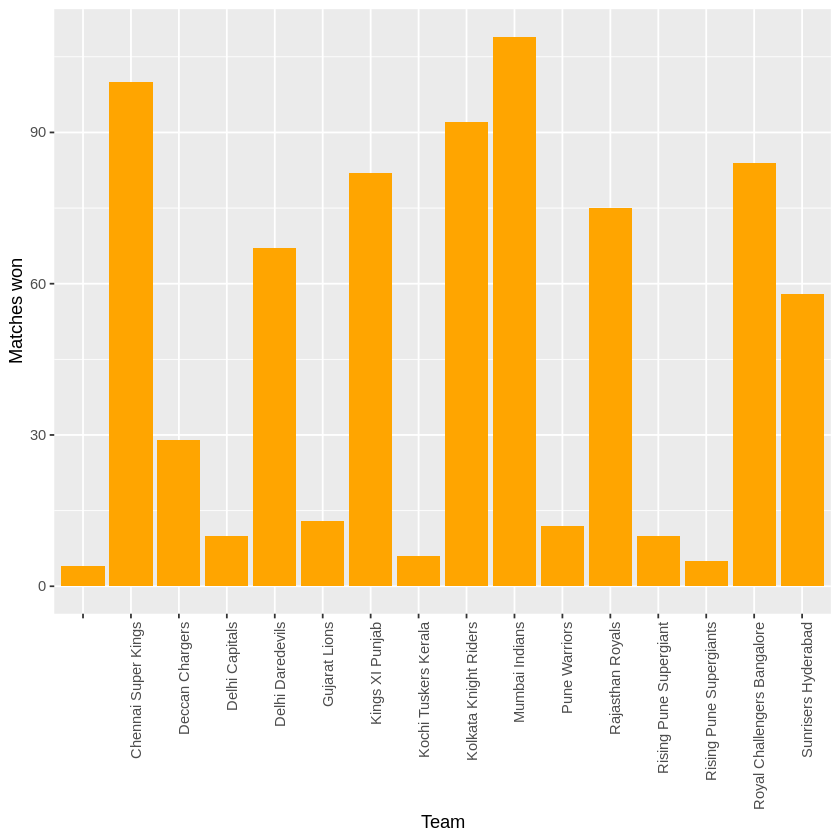

In [48]:
ggplot(df,aes(winner)) +geom_bar(fill="orange") +theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+ylab("Matches won")

From the above data, we can conclude that MI, CSK and KKR are the most successful teams

### No. of matches played in each season

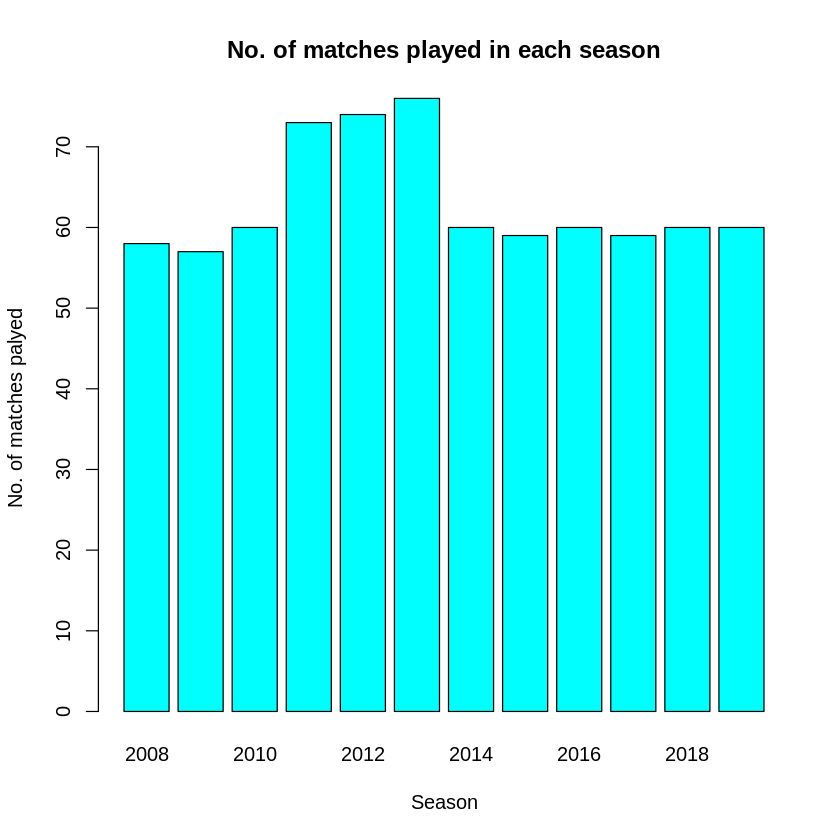

In [10]:
barplot(table(df$season), xlab="Season",ylab="No. of matches palyed",main="No. of matches played in each season",col="cyan")

### No. of matches played in a venue

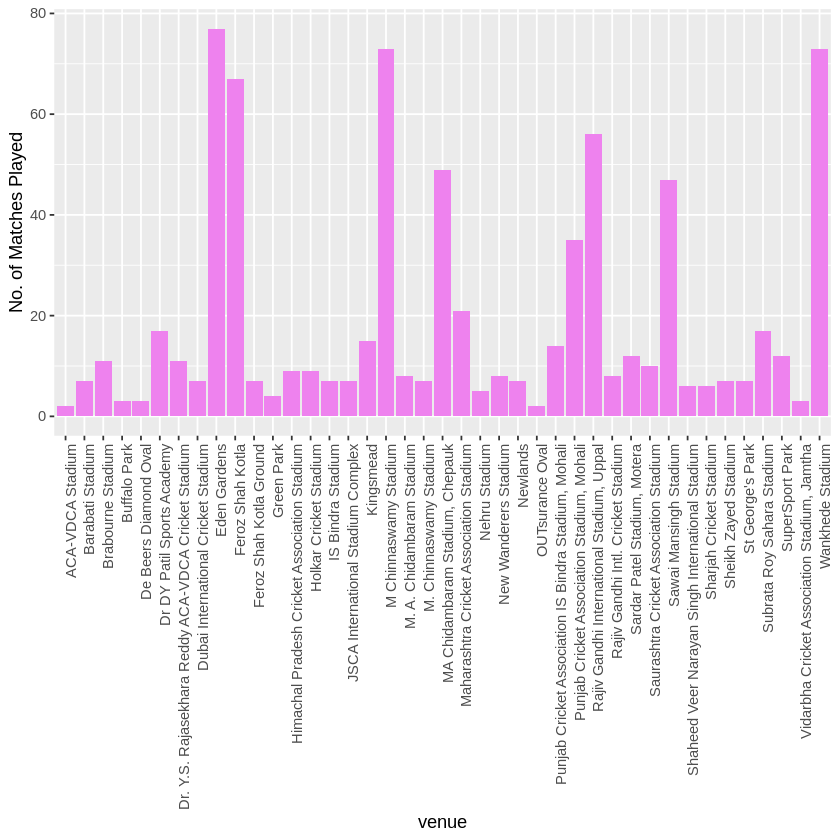

In [11]:
library("ggplot2")
ggplot(data = df,aes(venue)) +geom_bar(fill="violet") +ylab("No. of Matches Played")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

[1] "Mean:  3"

[1] "Variance:  11"

[1] "Standard deviation:  3"

[1] "1st Quartile:  0"

[1] "Median:  4"

[1] "3rd Quartile:  6"

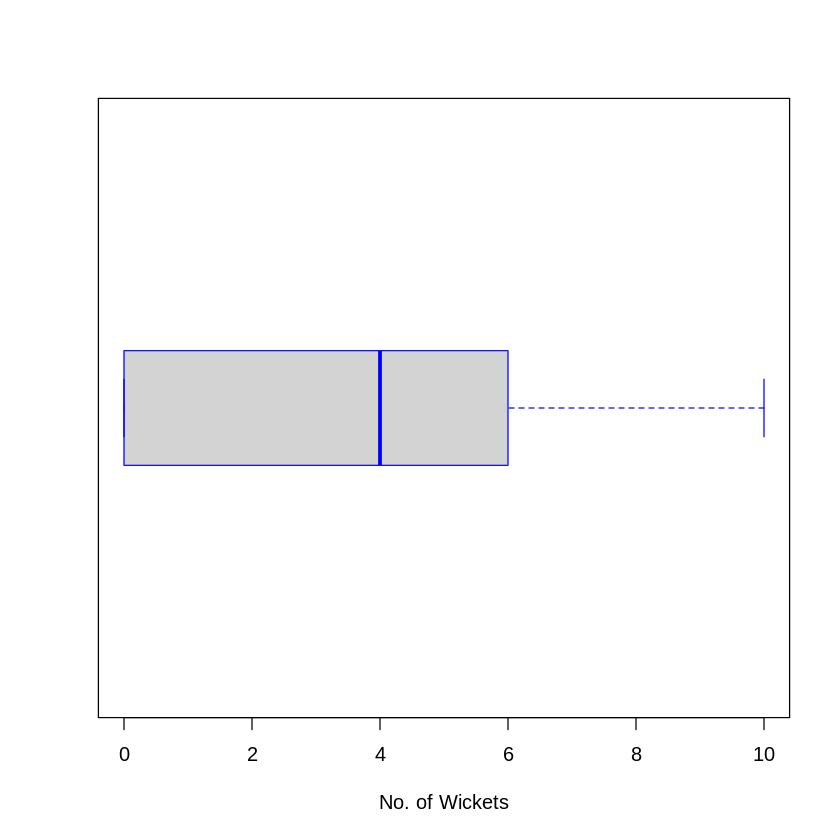

In [36]:
boxplot(df$win_by_wickets, horizontal=T, varwidth=TRUE,outline=TRUE, boxwex=0.2, border=c("blue"),xlab = "No. of Wickets")
paste("Mean: ",round(mean(df$win_by_wickets)))
paste("Variance: ",round(var(df$win_by_wickets)))
paste("Standard deviation: ",round(sd(df$win_by_wickets)))
paste("1st Quartile: ",quantile(df$win_by_wickets,prob=c(0.25)))
paste("Median: ",quantile(df$win_by_wickets,prob=c(0.50)))
paste("3rd Quartile: ",quantile(df$win_by_wickets,prob=c(0.75)))

[1] "Mean:  13"

[1] "Variance:  551"

[1] "Standard deviation:  23"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   13.28   19.00  146.00 

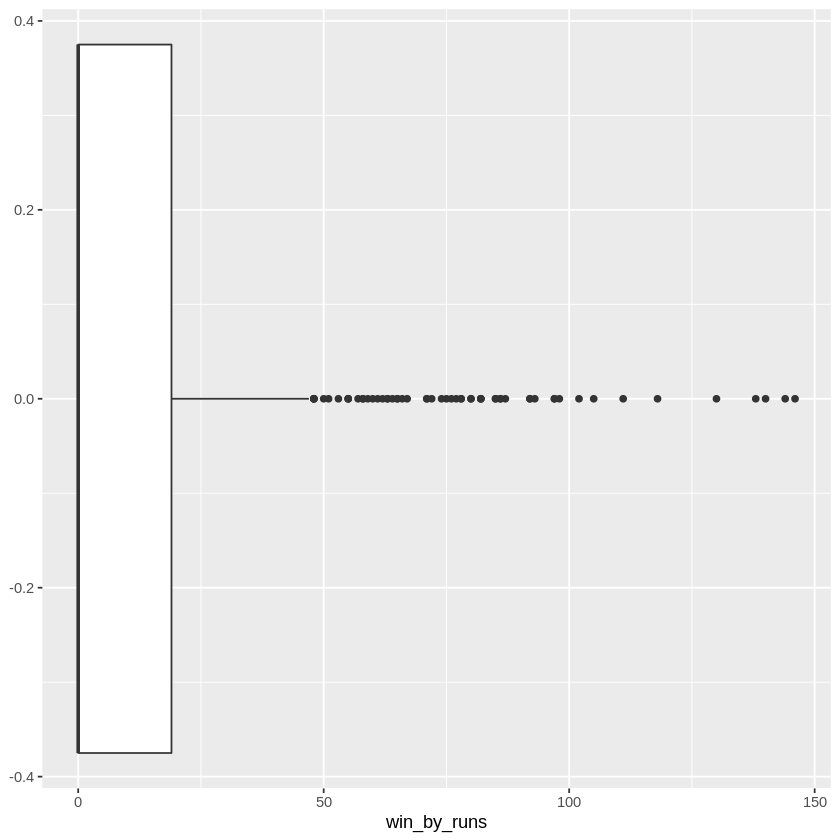

In [13]:
ggplot(df, aes(win_by_runs)) + geom_boxplot()
paste("Mean: ",round(mean(df$win_by_runs)))
paste("Variance: ",round(var(df$win_by_runs)))
paste("Standard deviation: ",round(sd(df$win_by_runs)))
summary(df$win_by_runs)

The outliers in the above data are plausibe, hence cannot be excluded

### Toss Descission

Decision,Count
<fct>,<int>
bat,293
field,463


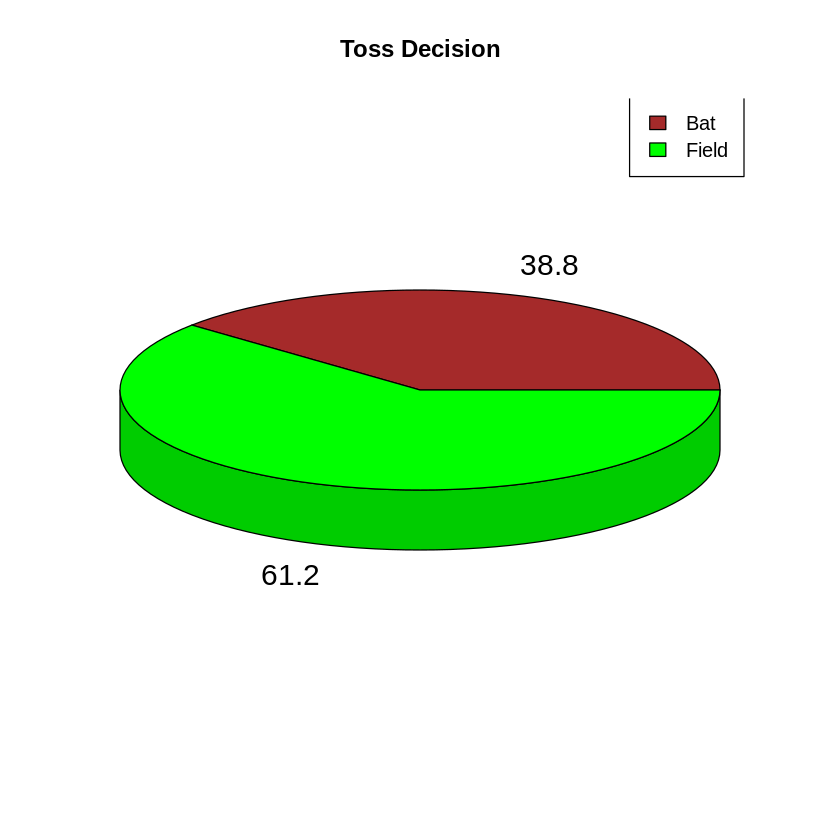

In [14]:
toss = data.frame(table(df$toss_decision))
colnames(toss) = c("Decision","Count")
pieper = round(100*toss$Count/sum(toss$Count), 1)
toss
pie3D(table(df$toss_decision),labels=pieper,main="Toss Decision",col=c("brown","green"))
legend("topright",c("Bat","Field"),fill=c("brown","green"))

### Duckworth Lewis Stern Applied

Status,Count
<chr>,<int>
Not Applied,737
Applied,19


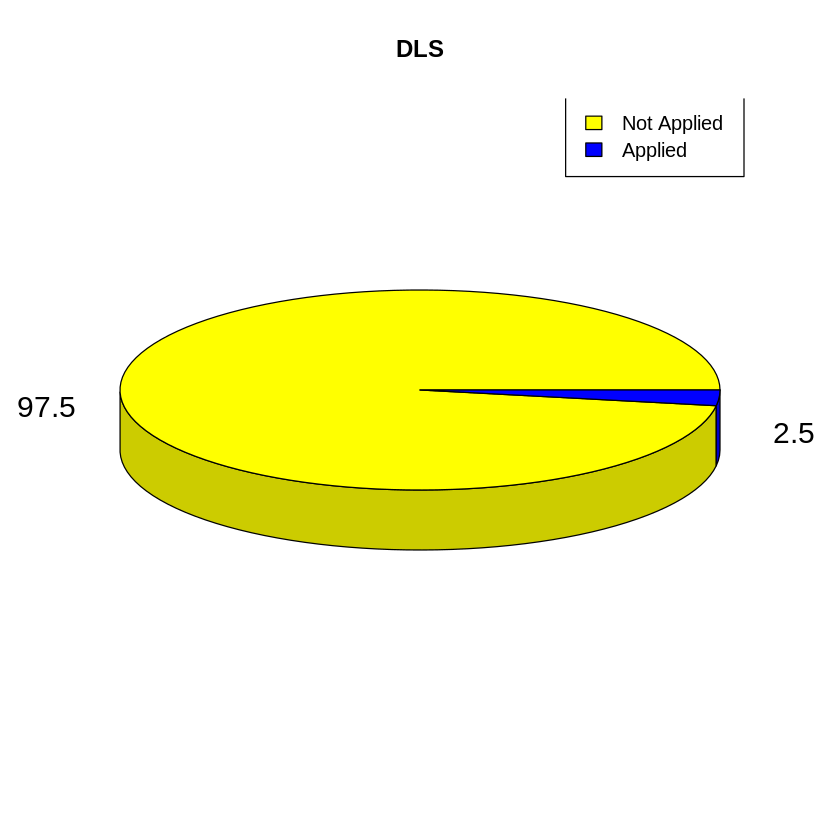

In [15]:
dls = data.frame(table(df$dl_applied))
colnames(dls) = c("Status","Count")
dls$Status = as.character(dls$Status)
dls$Status[dls$Status == "0"] = "Not Applied"
dls$Status[dls$Status == "1"] = "Applied"
piepercent = round(100*dls$Count/sum(dls$Count), 1)
pie3D(dls$Count, labels=piepercent,col=c("yellow","blue"),main="DLS")
legend("topright",c(dls$Status),fill=c("yellow","blue"))
dls

### Best Stadium for winning by runs

In [16]:
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
mode(df$venue[df$win_by_runs])

[1] "Wankhede Stadium"

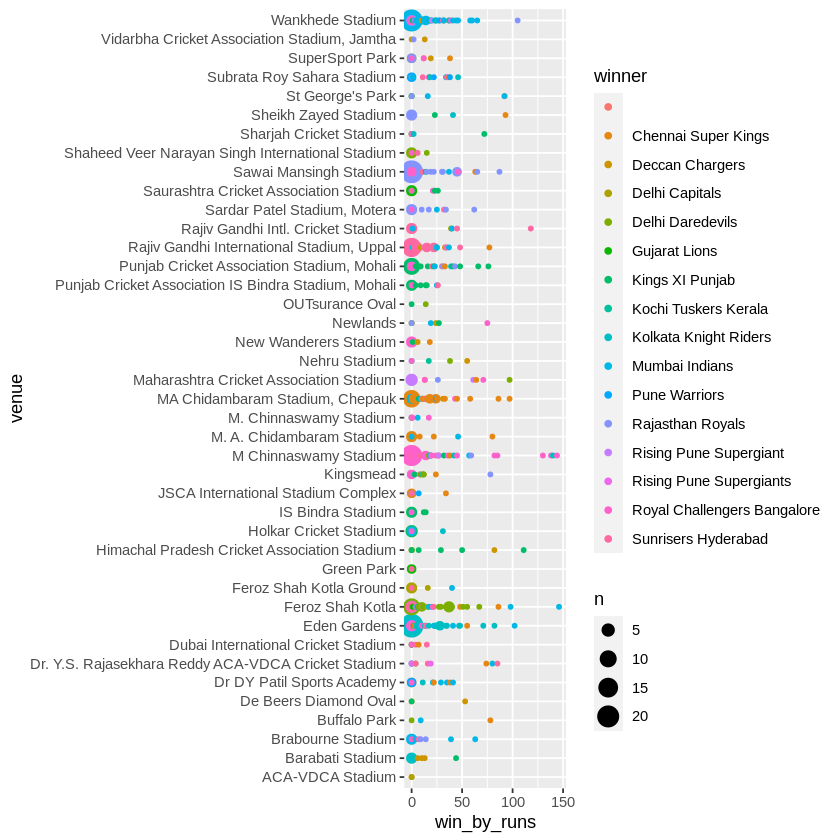

In [17]:
ggplot(df, aes(win_by_runs, venue, colour = winner)) + geom_count()

### Best Stadium for winning by wickets

In [18]:
mode(df$venue[df$win_by_wickets])

[1] "Holkar Cricket Stadium"

### Best Defending Team

In [19]:
mode(df$winner[df$win_by_runs])

[1] "Mumbai Indians"

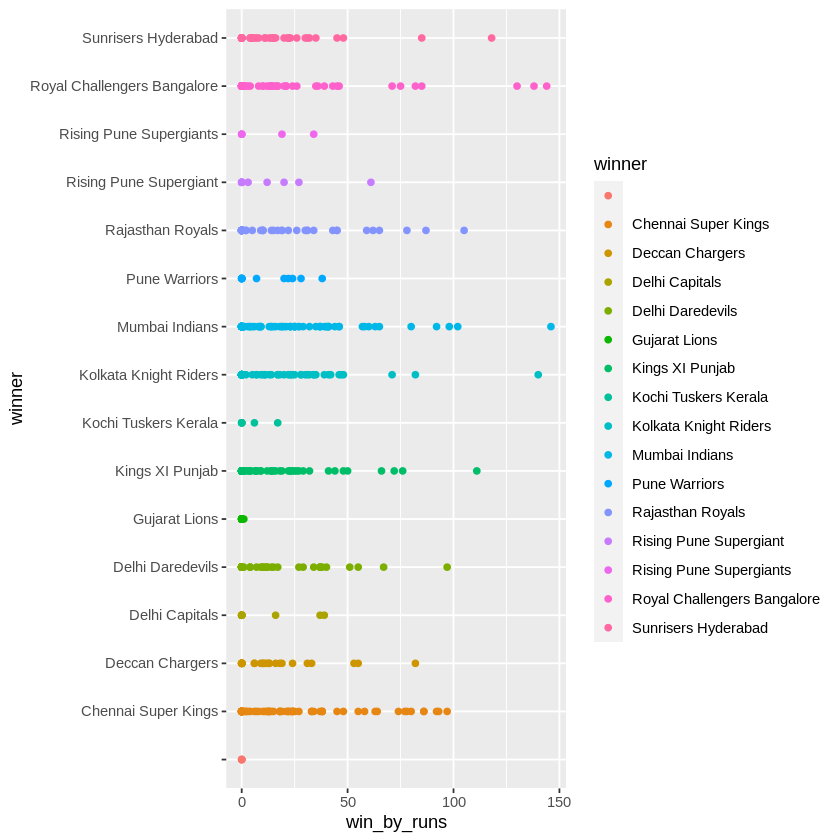

In [20]:
ggplot(df, aes(win_by_runs, winner, colour = winner)) + geom_point()

### Best Chasing Team

In [21]:
mode(df$winner[df$win_by_wickets])

[1] "Kings XI Punjab"

### Player of the match

In [38]:
player_match = data.frame(sort(table(df$player_of_match),decreasing = T))
colnames(player_match) = c("Player Name","No. Player of the Match awards won")
head(player_match,20)

,Player Name,No. Player of the Match awards won
,<fct>,<int>
1,CH Gayle,21
2,AB de Villiers,20
3,DA Warner,17
4,MS Dhoni,17
5,RG Sharma,17
6,YK Pathan,16
7,SR Watson,15
8,SK Raina,14
9,G Gambhir,13
